In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

In [21]:
import tensorflow as tf

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [58]:
def accuracy_fn(y_pred, y_true):
    correct_preds = torch.eq(y_pred, y_true).sum().item()
    accuracy = (correct_preds/len(y_pred)) * 100
    return accuracy

In [43]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer_1 = nn.Linear(28 * 28, 32)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.layer_2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer_2(x)
        return x

In [64]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [51]:
total_samples = len(x_train_normalized)
train_size = int((1 - validation_split) * total_samples)
val_size = total_samples - train_size

In [46]:
feature_tensor = torch.tensor(x_train_normalized, dtype=torch.float32)

label_tensor = torch.tensor(y_train, dtype=torch.float32)

dataset = torch.utils.data.TensorDataset(feature_tensor, label_tensor)

train_dataset, val_dataset = torch.utils.data.random_split(dataset,
                                                           [train_size, val_size])
    
    
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size, shuffle=True)
    
val_dataloader = torch.utils.data.DataLoader(val_dataset,
                                             batch_size=batch_size, shuffle=True)

In [65]:
tr_loss_list = []
tr_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(epochs):
    model.train()
    tr_epoch_loss = 0.0
    tr_acc = 0.0
    for batch_feature, batch_label in train_dataloader:
        batch_label = batch_label.type(torch.long)
        logits = model(batch_feature)
        train_loss = criterion(logits, batch_label)
        
        pred_labels_train = torch.softmax(logits, dim=1).argmax(dim=1)
        acc = accuracy_fn(y_true=batch_label, y_pred=pred_labels_train)
        
        optimizer.zero_grad()   
        train_loss.backward()   
        optimizer.step()
        tr_epoch_loss += train_loss.item()
        tr_acc += acc
    
    tr_loss_list.append(tr_epoch_loss / len(train_dataloader))
    tr_acc_list.append(tr_acc / len(train_dataloader))
    
    model.eval()
    with torch.no_grad():
        val_epoch_loss = 0.0
        val_acc = 0.0
        for batch_feature, batch_label in val_dataloader:
            batch_label = batch_label.type(torch.long)
            logits = model(batch_feature)            
            val_loss  = criterion(logits, batch_label)
            
            pred_labels_val = torch.softmax(logits, dim=1).argmax(dim=1)
            acc = accuracy_fn(y_true=batch_label, y_pred=pred_labels_val)
            
            val_acc += acc
            val_epoch_loss += val_loss.item()
            
            
        val_loss_list.append(val_epoch_loss / len(val_dataloader))
        val_acc_list.append(val_acc / len(val_dataloader))
        
    print(f"Epoch: {epoch} | Training Accuracy: {tr_acc / len(train_dataloader)} | Validation Accuracy: {val_acc / len(val_dataloader)} %")

Epoch: 0 | Training Accuracy: 46.69166666666666 | Validation Accuracy: 75.8 %
Epoch: 1 | Training Accuracy: 74.00625000000001 | Validation Accuracy: 84.7 %
Epoch: 2 | Training Accuracy: 80.67916666666666 | Validation Accuracy: 88.175 %
Epoch: 3 | Training Accuracy: 84.57916666666667 | Validation Accuracy: 89.47500000000001 %
Epoch: 4 | Training Accuracy: 86.7 | Validation Accuracy: 90.46666666666665 %
Epoch: 5 | Training Accuracy: 87.75208333333335 | Validation Accuracy: 90.93333333333332 %
Epoch: 6 | Training Accuracy: 88.72291666666666 | Validation Accuracy: 91.5 %
Epoch: 7 | Training Accuracy: 89.17708333333333 | Validation Accuracy: 91.85833333333335 %
Epoch: 8 | Training Accuracy: 89.7375 | Validation Accuracy: 92.22499999999998 %
Epoch: 9 | Training Accuracy: 90.08333333333333 | Validation Accuracy: 92.55000000000001 %
Epoch: 10 | Training Accuracy: 90.45208333333333 | Validation Accuracy: 92.74166666666667 %
Epoch: 11 | Training Accuracy: 90.76041666666667 | Validation Accuracy:

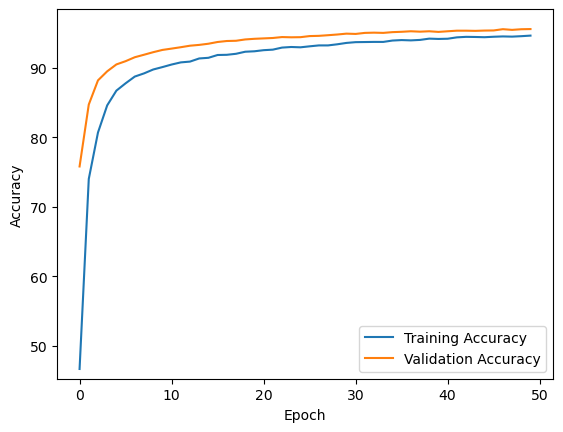

In [68]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(range(epochs), tr_acc_list, label="Training Accuracy")
plt.plot(range(epochs), val_acc_list, label="Validation Accuracy")

merged_acc_lists = tr_acc_list + val_acc_list
highest_acc = max(merged_acc_lists)
lowest_acc = min(merged_acc_lists)
top_of_y_axis = highest_acc * 1.03
bottom_of_y_axis = lowest_acc * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()